# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 616


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city - recieved guidance from Xpert Learning Assistant
    city_url = f"{url}q={city}&appid={weather_api_key}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data - recieved guidance from Xpert Learning Assistant
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | westport
Processing Record 2 of Set 1 | adamstown
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | san patricio
Processing Record 5 of Set 1 | taiohae
City not found. Skipping...
Processing Record 6 of Set 1 | kostomuksha
Processing Record 7 of Set 1 | puerto natales
Processing Record 8 of Set 1 | siping
Processing Record 9 of Set 1 | thompson
Processing Record 10 of Set 1 | kingscliff
Processing Record 11 of Set 1 | qaqortoq
Processing Record 12 of Set 1 | port-aux-francais
Processing Record 13 of Set 1 | solnechnyy
Processing Record 14 of Set 1 | bredasdorp
Processing Record 15 of Set 1 | lihue
Processing Record 16 of Set 1 | hawaiian paradise park
Processing Record 17 of Set 1 | blackmans bay
Processing Record 18 of Set 1 | faya-largeau
Processing Record 19 of Set 1 | utrik
Processing Record 20 of Set 1 | albany
Processing Record 21 of Set 1 | puerto san carlos
City not fo

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          595
Lat           595
Lng           595
Max Temp      595
Humidity      595
Cloudiness    595
Wind Speed    595
Country       595
Date          595
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,westport,41.1415,-73.3579,17.55,55,75,6.69,US,1715449402
1,adamstown,-25.0660,-130.1015,21.37,68,73,5.70,PN,1715449928
2,ushuaia,-54.8000,-68.3000,6.81,65,20,10.80,AR,1715449730
3,san patricio,28.0170,-97.5169,28.05,71,95,6.27,US,1715449929
4,kostomuksha,64.5710,30.5767,-1.09,94,96,6.26,RU,1715449743


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,westport,41.1415,-73.3579,17.55,55,75,6.69,US,1715449402
1,adamstown,-25.0660,-130.1015,21.37,68,73,5.70,PN,1715449928
2,ushuaia,-54.8000,-68.3000,6.81,65,20,10.80,AR,1715449730
3,san patricio,28.0170,-97.5169,28.05,71,95,6.27,US,1715449929
4,kostomuksha,64.5710,30.5767,-1.09,94,96,6.26,RU,1715449743


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

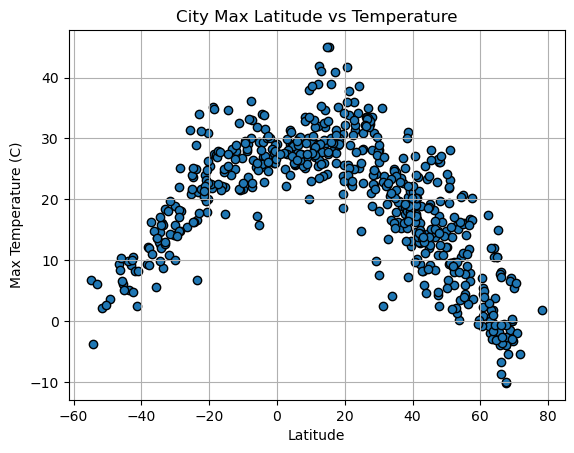

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Max Latitude vs Temperature")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

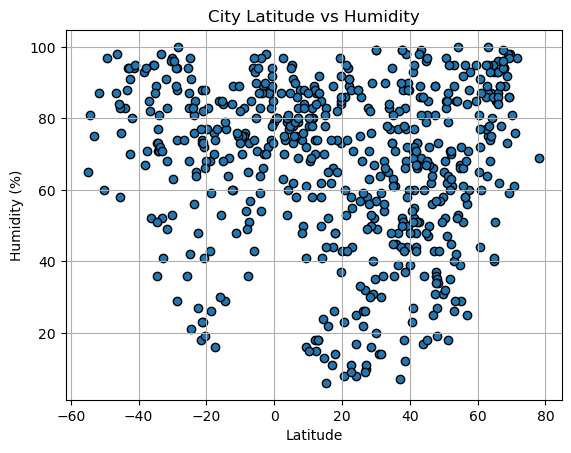

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

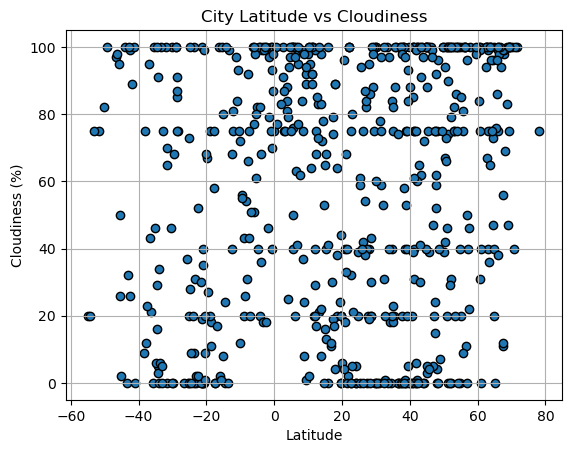

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

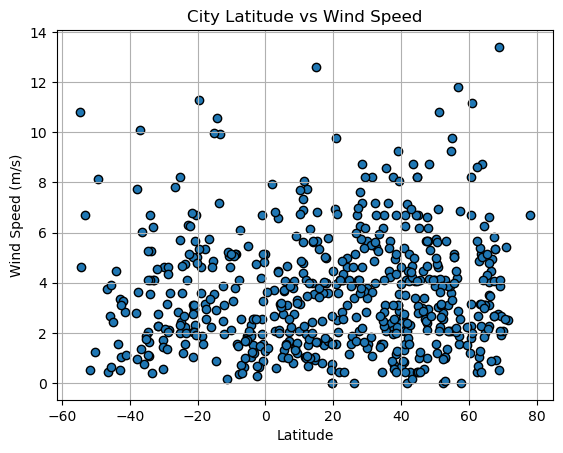

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,westport,41.1415,-73.3579,17.55,55,75,6.69,US,1715449402
3,san patricio,28.0170,-97.5169,28.05,71,95,6.27,US,1715449929
4,kostomuksha,64.5710,30.5767,-1.09,94,96,6.26,RU,1715449743
6,siping,43.1633,124.3686,8.29,69,62,4.66,CN,1715449930
7,thompson,55.7435,-97.8558,14.09,51,75,5.14,CA,1715449930


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,adamstown,-25.0660,-130.1015,21.37,68,73,5.70,PN,1715449928
2,ushuaia,-54.8000,-68.3000,6.81,65,20,10.80,AR,1715449730
5,puerto natales,-51.7236,-72.4875,2.25,87,75,0.51,CL,1715449906
8,kingscliff,-28.2667,153.5667,18.18,100,75,3.60,AU,1715449930
10,port-aux-francais,-49.3500,70.2167,3.67,97,100,8.12,TF,1715449931


###  Temperature vs. Latitude Linear Regression Plot

The r value is: -0.8313363121880127


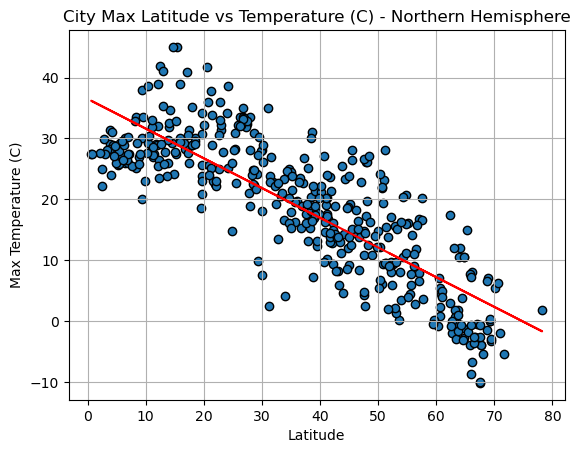

In [16]:
# Linear regression on Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, marker="o", edgecolors="black")
plt.title("City Max Latitude vs Temperature (C) - Northern Hemisphere")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)
plt.plot(x_values, regress_values, "r-")

plt.annotate(line_eq, (10, 260), fontsize=15, color="red")

print(f"The r value is: {rvalue}")

plt.show()


The r value is: 0.8435935653710054


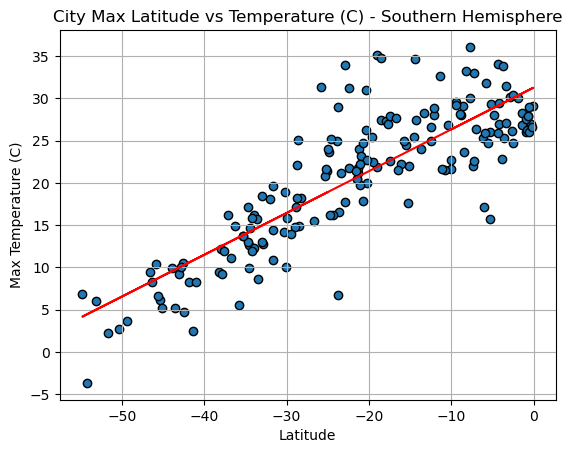

In [18]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, marker="o", edgecolors="black")
plt.title("City Max Latitude vs Temperature (C) - Southern Hemisphere")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)
plt.plot(x_values, regress_values, "r-")

plt.annotate(line_eq, (-25, 275), fontsize=15, color="red")

print(f"The r value is: {rvalue}")

plt.show()

### Humidity vs. Latitude Linear Regression Plot

The r value is: 0.1449402868886758


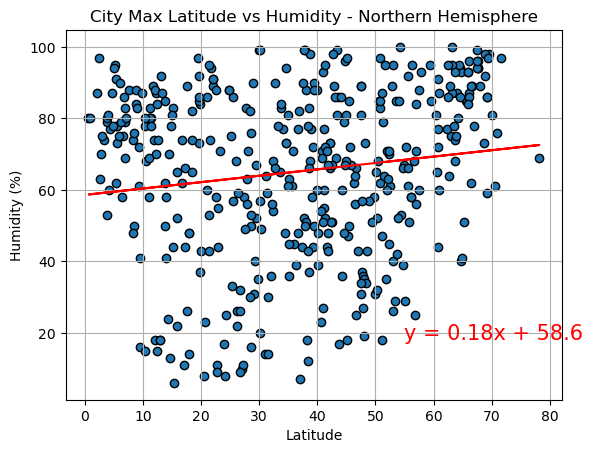

In [19]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, marker="o", edgecolors="black")
plt.title("City Max Latitude vs Humidity - Northern Hemisphere")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.plot(x_values, regress_values, "r-")

plt.annotate(line_eq, (55, 18), fontsize=15, color="red")

print(f"The r value is: {rvalue}")

plt.show()

The r value is: -0.06208249140531077


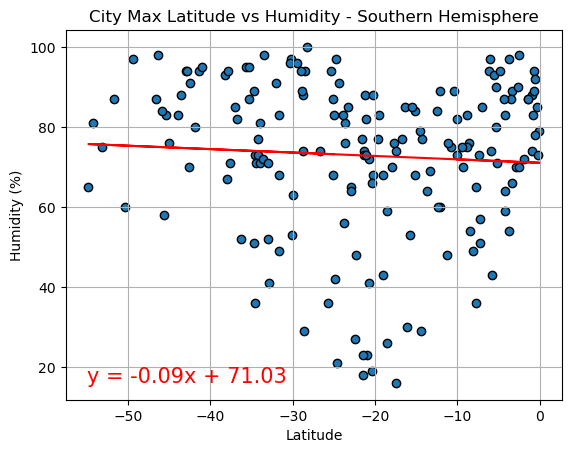

In [20]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, marker="o", edgecolors="black")
plt.title("City Max Latitude vs Humidity - Southern Hemisphere")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.plot(x_values, regress_values, "r-")

plt.annotate(line_eq, (-55, 16), fontsize=15, color="red")

print(f"The r value is: {rvalue}")

plt.show()

### Cloudiness vs. Latitude Linear Regression Plot

The r value is: 0.10429693282905189


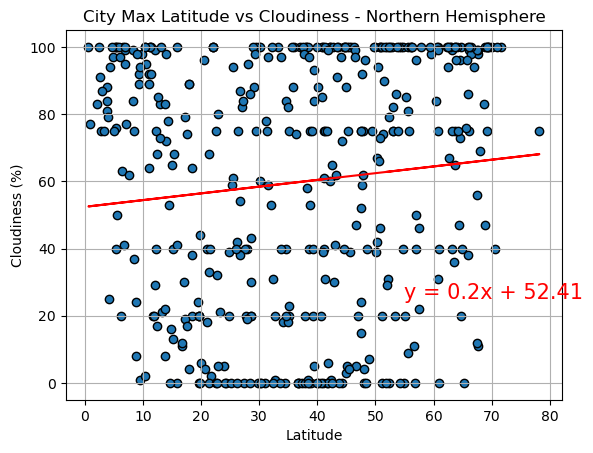

In [21]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, marker="o", edgecolors="black")
plt.title("City Max Latitude vs Cloudiness - Northern Hemisphere")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.plot(x_values, regress_values, "r-")

plt.annotate(line_eq, (55, 25), fontsize=15, color="red")

print(f"The r value is: {rvalue}")

plt.show()

The r value is: 0.17050167048405857


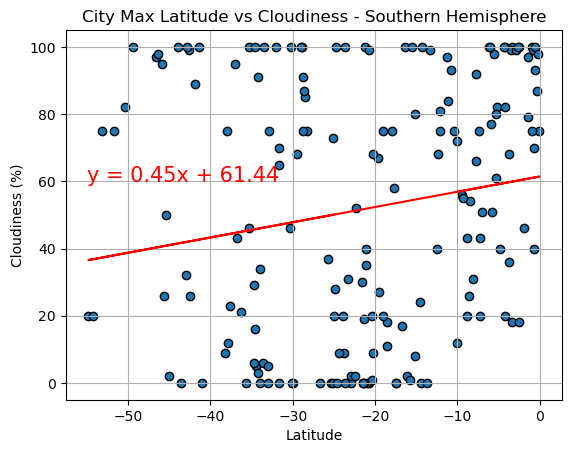

In [23]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, marker="o", edgecolors="black")
plt.title("City Max Latitude vs Cloudiness - Southern Hemisphere")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.plot(x_values, regress_values, "r-")

plt.annotate(line_eq, (-55, 60), fontsize=15, color="red")

print(f"The r value is: {rvalue}")

plt.show()

**Discussion about the linear relationship:** There is a very weak positive correlation in both the northern and southern hemispheres between the cities' latitudes and cloudiness percentages.

### Wind Speed vs. Latitude Linear Regression Plot

The r value is: 0.060156513327417865


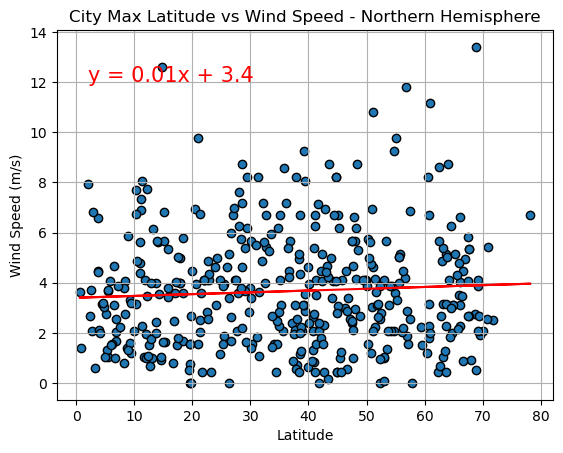

In [24]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, marker="o", edgecolors="black")
plt.title("City Max Latitude vs Wind Speed - Northern Hemisphere")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)
plt.plot(x_values, regress_values, "r-")

plt.annotate(line_eq, (2, 12), fontsize=15, color="red")

print(f"The r value is: {rvalue}")

plt.show()

The r value is: -0.09833887544462645


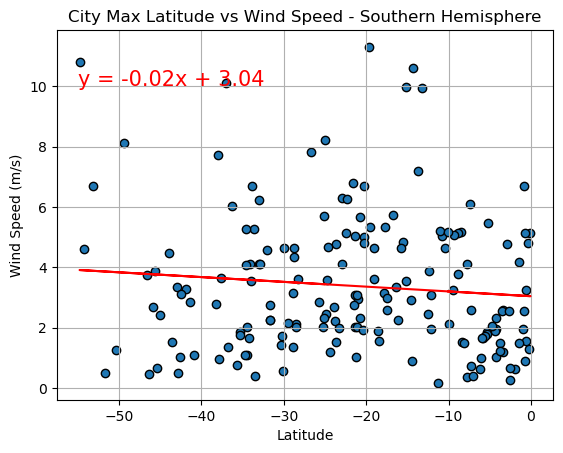

In [25]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, marker="o", edgecolors="black")
plt.title("City Max Latitude vs Wind Speed - Southern Hemisphere")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)
plt.plot(x_values, regress_values, "r-")

plt.annotate(line_eq, (-55, 10), fontsize=15, color="red")

print(f"The r value is: {rvalue}")

plt.show()

**Discussion about the linear relationship:** There is a very weak negative correlation between southern hemisphere cities' latitudes and max wind speeds. There is a very weak positive correlation between northern hemisphere cities' latitudes and max wind speeds.